## Generative Model
A generative model is a statistical model of the joint probability distribution P(X,Y) on given observable variable X and target variable Y.

A generative model includes the distribution of the data itself, and tells you how likely a given example is. For example, models that predict the next word in a sequence are typically generative models (usually much simpler than GANs) because they can assign a probability to a sequence of words.

### Problem statement

Implement a Generative model which generates text characters based upon prior probability of the word length.

In [1]:
import string
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# No of words to generate
generate_words_count = 3000

In [3]:
# Validate words
def getvalid_words(allwords):
    valid_words =[]
    words_length = []
    for word in allwords:
        # alpha numeric words
        if(word.isalnum()):
            valid_words.append(word)
            words_length.append(len(word))
    return valid_words,words_length

#### Word length probabilities is used as a prior probability for new text length generation

In [4]:
# compute input text word length probabilites 
def compute_len_probs(len_lst):
    probs_len = []
    freq_len = []
    unique_lens = list(set(len_lst))
    unique_lens.sort()
    for value in unique_lens:
        freq_len.append(len_lst.count(value))
    probs_len = compute_probs(freq_len)
    return probs_len

#### character probabilities is used as a prior probability for new character generation

In [5]:
# compute Input text character probabilites
def compute_char_probs(word_lst,unique_chars):
    freq_char =[]
    chars = []
    char_probs = []
    overallText=""
    for word in word_lst:
        overallText = overallText + str(word)      
    for char in unique_chars:
        if overallText.count(char) > 0:
            chars.append(char)
            freq_char.append(overallText.count(char))     
    for value in freq_char:
        char_probs.append( value/sum(freq_char))

    return chars,char_probs

In [6]:
# generic probability calculation
def compute_probs(lst):
    probs=[]
    total_sum = sum(lst)
    for value in lst:
        probs.append(value/total_sum)
    return probs

In [7]:
# generate words and store new words lengths
def generate_words(probs_len ,chars ,char_probs,word_lengths):
    global generate_words_count
    overall_text=""
    gen_word_lens =[]
    for n in range(0,generate_words_count):
        word = ""
        gen_len = np.random.choice(max(word_lengths),1,p=probs_len)
        gen_chars = np.random.choice(chars ,gen_len, p=char_probs)
        for c in gen_chars:
            word += str(c)
        gen_word_lens.append(len(word))
        overall_text = overall_text + word + " "
    return overall_text , gen_word_lens

#### Graph plot of Word lengh vs probability for Input text and the generated text.

In [8]:
# graph plot of sample and generate text word length 
def graph_plot(input_word_probs,gen_word_probs,word_length):
    plt.plot(np.arange(1,word_length+1),input_word_probs, 'b', label = 'sample text')
    plt.plot(np.arange(1,word_length+1),gen_word_probs, 'r', label = 'generated text')
    plt.xlabel('word length')
    plt.ylabel('Probability')
    plt.show()

In [9]:
def main():
    with open('./Text_sample.txt','r') as f:
        content = f.read()
        f.close()

    # cleaning data
    content = content.lower()
    allwords = content.split(" ")
    valid_words , word_lengths = getvalid_words(allwords)

    #sample-text word probability
    length_probs = compute_len_probs(word_lengths)
    
    # regular expression
    allchars = re.findall("[a-z0-9]",content)
    unique_chars = list(set(allchars))

    #sample-text char probability
    chars,char_probs = compute_char_probs(valid_words,unique_chars)

    #generated-text
    generated_text , gen_word_lengths = generate_words(length_probs,chars,char_probs,word_lengths)
    gen_length_probs = compute_len_probs(gen_word_lengths)
    f = open("Generated_words.txt", "w+")
    f.write(generated_text)
    f.close()

    graph_plot(length_probs,gen_length_probs,max(word_lengths))


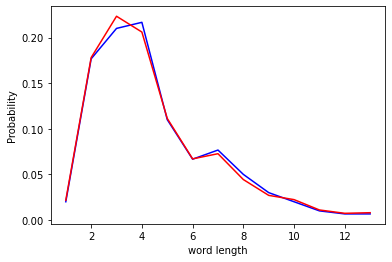

In [10]:
if __name__ == "__main__":
    main()

## Evaluate

The word length from 2 to 4 is sensitivity and hence comparitively high variation . From length 4 the probability distribution is quite similar for Input and Generated text